In [1]:
using Plots, PlotRecipes
using LaTeXStrings

    +(AbstractArray

# Tarea 3

### Ejercicio 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?

In [2]:
function FdeX(x)
    f = x^2 - 2
    return f
end;    

, DataArrays.

In [3]:
n = 100
Datos1 = [0]
Datos2 = [0.1]
Datos3 = [0.001]
for i in 2:n
    x = FdeX(Datos1[i-1])
    push!(Datos1,x)
    x = FdeX(Datos2[i-1])
    push!(Datos2,x)
    x = FdeX(Datos3[i-1])
    push!(Datos3,x)
end    

DataArray) at C:\Users\Franco\.julia\v0.4\DataArrays\src\operators.jl:276


is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at C:\Users\Franco\.julia\v0.4\WoodburyMatrices\src\SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at C:\Users\Franco\.julia\v0.4\DataArrays\src\operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at C:\Users\Franco\.julia\v0.4\WoodburyMatrices\src\SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


[Plots.jl] Initializing backend: pyplot



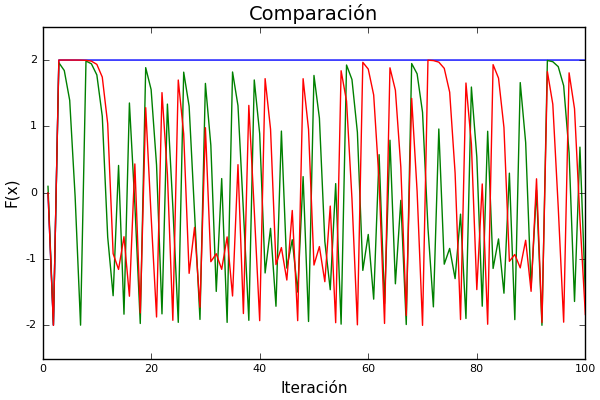

In [4]:
plot(   xaxis=("Iteración", (0,100)),
        yaxis=("F(x)",(-2.5,2.5)),
        legend=false, title="Comparación", grid=false)

plot!(Datos1, color=(:blue))
plot!(Datos2, color=(:green))
plot!(Datos3, color=(:red))

La función tiene un punto atractor en 2.

### Ejercicio 2

Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

In [5]:
F(x)=sqrt(x);

In [6]:
function IteradorDeEntesAbstractos(f,n,x0,MinX,MaxX,MinY,MaxY)
    rangox = MinX:0.01:MaxX
    VectorX = Float64[]
    VectorY = Float64[]
    push!(VectorX,x0)
    push!(VectorX,x0)
    y = f(VectorX[1])
    push!(VectorY,x0)
    push!(VectorY,y)
    for i in 3:2:n
        push!(VectorX,VectorY[i-1])
        push!(VectorX,VectorY[i-1])
        push!(VectorY,VectorY[i-1])
        push!(VectorY,f(VectorX[i-1]))
    end
    plot(rangox, f, 
    xaxis=(L"x", (MinX:MaxX)), 
    yaxis=(L"F(x)", (MinY:MaxY)), 
        legend=false, grid=false)
    
    plot!(rangox, x->x, color=:red) 
    plot!(VectorX,VectorY, line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))
end           

IteradorDeEntesAbstractos (generic function with 1 method)


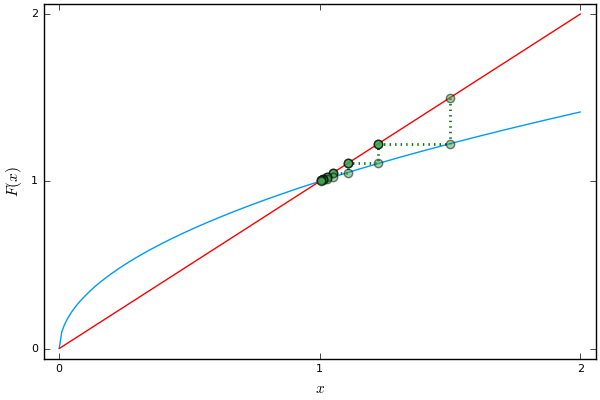

In [7]:
IteradorDeEntesAbstractos(F,25,1.5,0.0,2.0,0.0,2.0)

### Ejercicio 3

Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 

In [8]:
function H(x)
    g = x^2 - 1.1
    return g
end

H (generic function with 1 method)


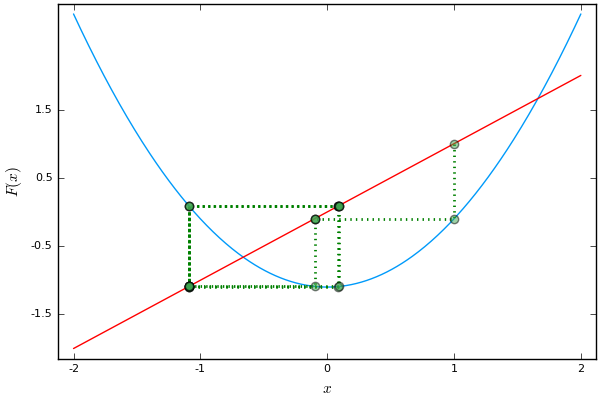

In [9]:
IteradorDeEntesAbstractos(H,25,1.0,-2.0,2.0,-1.5,2.0)

### Ejercicio 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

In [10]:
function F1(x)
    f1 = 1 / (3.0 * x)
    return f1
end

function F2(x)
    f2 = -0.2 * x^5
    return f2
end

function F3(x)
    f3 = 0.5 * x - 2.0
    return f3
end

F3 (generic function with 1 method)

In [11]:
function IteradorDeEntesAbstractosV2(f,n,x0)
    VectorX = Float64[]
    VectorY = Float64[]
    push!(VectorX,x0)
    push!(VectorX,x0)
    y = f(VectorX[1])
    push!(VectorY,x0)
    push!(VectorY,y)
    for i in 3:2:n
        push!(VectorX,VectorY[i-1])
        push!(VectorX,VectorY[i-1])
        push!(VectorY,VectorY[i-1])
        push!(VectorY,f(VectorX[i-1]))
    end
    return VectorX,VectorY
end             

IteradorDeEntesAbstractosV2 (generic function with 1 method)


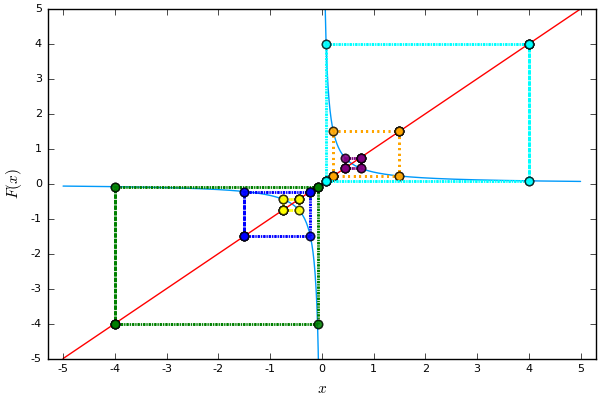

In [12]:
rangox = -5.0:0.01:5.0
plot(rangox, F1, 
    xaxis=(L"x", (-5.0:5.0)), 
    yaxis=(L"F(x)", (-5.0:5.0)), 
    legend=false, grid=false)
plot!(rangox, x->x, color=:red) 

VectorX1,VectorY1 = IteradorDeEntesAbstractosV2(F1,25,-4.0)
plot!(VectorX1,VectorY1, line=(:green, :path, 2.0, :dot), marker=(:point, :green, 0.5))

VectorX2,VectorY2 = IteradorDeEntesAbstractosV2(F1,25,-1.5)
plot!(VectorX2,VectorY2, line=(:blue, :path, 2.0, :dot), marker=(:point, :blue, 0.5))

VectorX3,VectorY3 = IteradorDeEntesAbstractosV2(F1,25,-0.75)
plot!(VectorX3,VectorY3, line=(:yellow, :path, 2.0, :dot), marker=(:point, :yellow, 0.5))

VectorX4,VectorY4 = IteradorDeEntesAbstractosV2(F1,25,0.75)
plot!(VectorX4,VectorY4, line=(:purple, :path, 2.0, :dot), marker=(:point, :purple, 0.5))

VectorX5,VectorY5 = IteradorDeEntesAbstractosV2(F1,25,1.5)
plot!(VectorX5,VectorY5, line=(:orange, :path, 2.0, :dot), marker=(:point, :orange, 0.5))

VectorX6,VectorY6= IteradorDeEntesAbstractosV2(F1,25,4.0)
plot!(VectorX6,VectorY6, line=(:cyan, :path, 2.0, :dot), marker=(:point, :cyan, 0.5))

Todas las órbitas que se generan son de periodo dos.


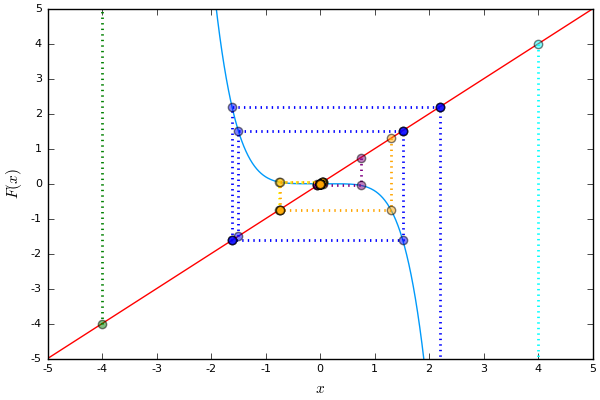

In [13]:
rangox = -5.0:0.01:5.0
plot(rangox, F2, 
    xaxis=(L"x", (-5.0:5.0)), 
    yaxis=(L"F(x)", (-5.0:5.0)), 
    legend=false, grid=false)
plot!(rangox, x->x, color=:red) 

VectorX1,VectorY1 = IteradorDeEntesAbstractosV2(F2,25,-4.0)
plot!(VectorX1,VectorY1, line=(:green, :path, 2.0, :dot), marker=(:point, :green, 0.5))

VectorX2,VectorY2 = IteradorDeEntesAbstractosV2(F2,25,-1.5)
plot!(VectorX2,VectorY2, line=(:blue, :path, 2.0, :dot), marker=(:point, :blue, 0.5))

VectorX3,VectorY3 = IteradorDeEntesAbstractosV2(F2,25,-0.75)
plot!(VectorX3,VectorY3, line=(:yellow, :path, 2.0, :dot), marker=(:point, :yellow, 0.5))

VectorX4,VectorY4 = IteradorDeEntesAbstractosV2(F2,25,0.75)
plot!(VectorX4,VectorY4, line=(:purple, :path, 2.0, :dot), marker=(:point, :purple, 0.5))

VectorX5,VectorY5 = IteradorDeEntesAbstractosV2(F2,25,1.3)
plot!(VectorX5,VectorY5, line=(:orange, :path, 2.0, :dot), marker=(:point, :orange, 0.5))

VectorX6,VectorY6= IteradorDeEntesAbstractosV2(F2,25,4.0)
plot!(VectorX6,VectorY6, line=(:cyan, :path, 2.0, :dot), marker=(:point, :cyan, 0.5))

Podemos ver que si la condición inicial x0 es tal que |X0| > 1.5  aproximadamente entonces no hay convergencia; pero en caso contrario todas las orbitas convergen a cero.


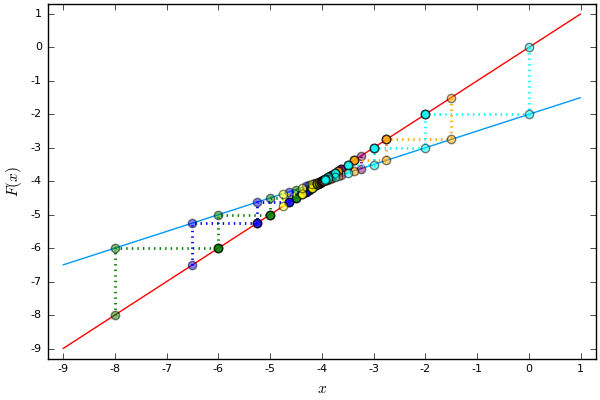

In [14]:
rangox = -9.0:0.01:1.0
plot(rangox, F3, 
    xaxis=(L"x", (-9.0:1.0)), 
    yaxis=(L"F(x)", (-9.0:1.0)), 
    legend=false, grid=false)
plot!(rangox, x->x, color=:red) 

VectorX1,VectorY1 = IteradorDeEntesAbstractosV2(F3,25,-8.0)
plot!(VectorX1,VectorY1, line=(:green, :path, 2.0, :dot), marker=(:point, :green, 0.5))

VectorX2,VectorY2 = IteradorDeEntesAbstractosV2(F3,25,-6.5)
plot!(VectorX2,VectorY2, line=(:blue, :path, 2.0, :dot), marker=(:point, :blue, 0.5))

VectorX3,VectorY3 = IteradorDeEntesAbstractosV2(F3,25,-4.75)
plot!(VectorX3,VectorY3, line=(:yellow, :path, 2.0, :dot), marker=(:point, :yellow, 0.5))

VectorX4,VectorY4 = IteradorDeEntesAbstractosV2(F3,25,-3.25)
plot!(VectorX4,VectorY4, line=(:purple, :path, 2.0, :dot), marker=(:point, :purple, 0.5))

VectorX5,VectorY5 = IteradorDeEntesAbstractosV2(F3,25,-1.5)
plot!(VectorX5,VectorY5, line=(:orange, :path, 2.0, :dot), marker=(:point, :orange, 0.5))

VectorX6,VectorY6= IteradorDeEntesAbstractosV2(F3,25,0.0)
plot!(VectorX6,VectorY6, line=(:cyan, :path, 2.0, :dot), marker=(:point, :cyan, 0.5))

Podemos ver que todas las orbitas convergen a menos cuatro.

### Ejercicio 5

Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

In [15]:
function IteradorFdeX(n,x0)
    x = FdeX(x0)
    DatosH = Float64[x]
    Valor = Float64[]
    Frecuencia = Int64[]
    for i in 2:n
        x = FdeX(DatosH[i-1])
        push!(DatosH,x)
    end 
    histogram(DatosH,
        xaxis=(L"X", (-2.25,2.25)), 
        yaxis=(L"Frecuencia", (0:n/10:n)),
        legend=false, grid=true)
end

IteradorFdeX (generic function with 1 method)


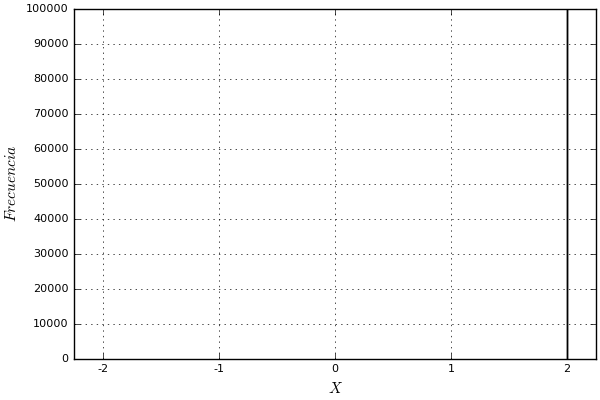

In [16]:
IteradorFdeX(100000,2.0)


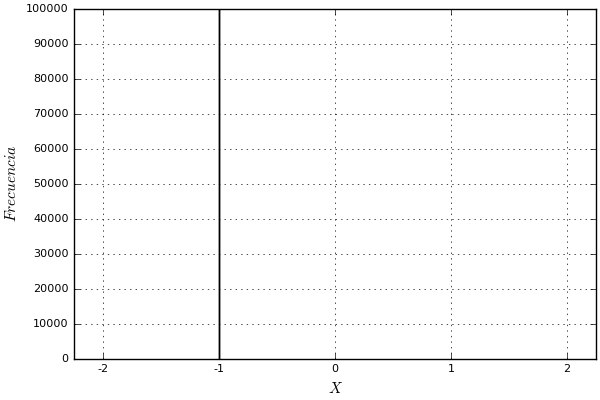

In [17]:
IteradorFdeX(100000,-1.0)


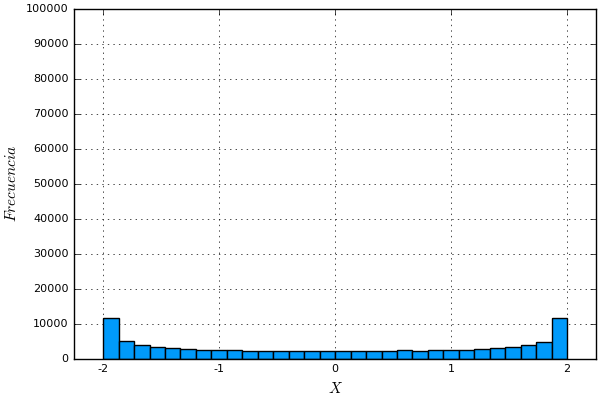

In [18]:
IteradorFdeX(100000,-0.05465416857468)


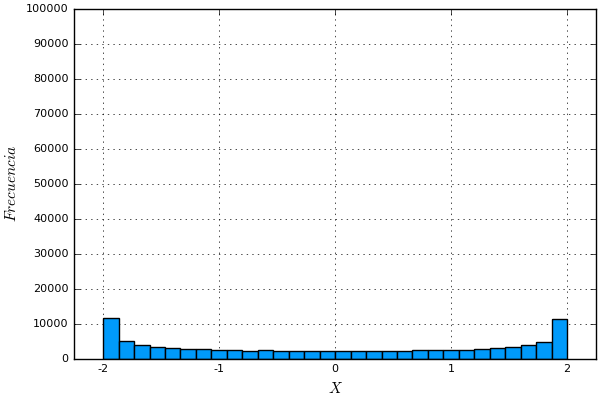

In [19]:
IteradorFdeX(100000,1.1379579527)

Podemos decir que x = 2.0 y x = -1.0 son puntos fijos repulsivos, ya que tras 100,000 iteraciones ninguna de las pruebas se acerco a estos valores.

### Ejercicio 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.

In [20]:
function F4(x)
    f4 = x^2
    return f4
end

function F5(x)
    f5 = x^3
    return f5
end

function F6(x)
    f6 = -x^3
    return f6
end

F6 (generic function with 1 method)


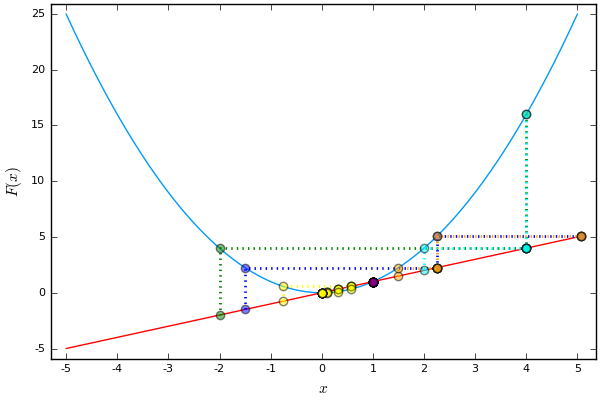

In [21]:
rangox = -5.0:0.01:5.0
plot(rangox, F4, 
    xaxis=(L"x", (-5.0:5.0)), 
    yaxis=(L"F(x)", (-5.0:5.0:25.0)), 
    legend=false, grid=false)
plot!(rangox, x->x, color=:red) 

VectorX1,VectorY1 = IteradorDeEntesAbstractosV2(F4,6,-2.0)
plot!(VectorX1,VectorY1, line=(:green, :path, 2.0, :dot), marker=(:point, :green, 0.5))

VectorX2,VectorY2 = IteradorDeEntesAbstractosV2(F4,7,-1.5)
plot!(VectorX2,VectorY2, line=(:blue, :path, 2.0, :dot), marker=(:point, :blue, 0.5))

VectorX3,VectorY3 = IteradorDeEntesAbstractosV2(F4,25,-0.75)
plot!(VectorX3,VectorY3, line=(:yellow, :path, 2.0, :dot), marker=(:point, :yellow, 0.5))

VectorX4,VectorY4 = IteradorDeEntesAbstractosV2(F4,25,1.0)
plot!(VectorX4,VectorY4, line=(:purple, :path, 2.0, :dot), marker=(:point, :purple, 0.5))

VectorX5,VectorY5 = IteradorDeEntesAbstractosV2(F4,7,1.5)
plot!(VectorX5,VectorY5, line=(:orange, :path, 2.0, :dot), marker=(:point, :orange, 0.5))

VectorX6,VectorY6= IteradorDeEntesAbstractosV2(F4,6,2.0)
plot!(VectorX6,VectorY6, line=(:cyan, :path, 2.0, :dot), marker=(:point, :cyan, 0.5))

Se iteraron pocas veces los números mayores a uno, en valor absoluto, porqué divergen muy rápido. Por otro lado los números menores a uno, en valor absoluto, convergen a cero y uno es un punto fijo.


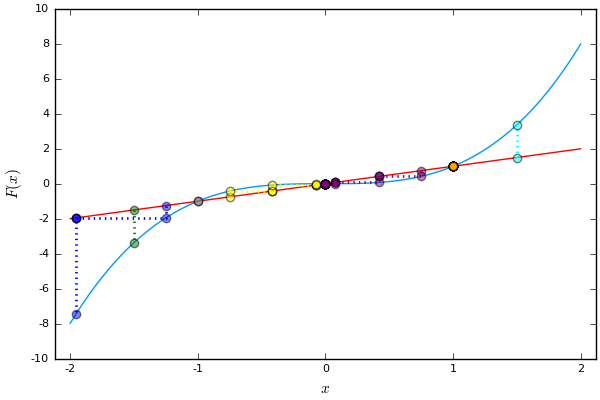

In [29]:
rangox = -2.0:0.01:2.0
plot(rangox, F5, 
    xaxis=(L"x", (-2.0:2.0)), 
    yaxis=(L"F(x)", (-10.0:2.0:10.0)), 
    legend=false, grid=false)
plot!(rangox, x->x, color=:red) 

VectorX1,VectorY1 = IteradorDeEntesAbstractosV2(F5,2,-1.5)
plot!(VectorX1,VectorY1, line=(:green, :path, 2.0, :dot), marker=(:point, :green, 0.5))

VectorX2,VectorY2 = IteradorDeEntesAbstractosV2(F5,6,-1.25)
plot!(VectorX2,VectorY2, line=(:blue, :path, 2.0, :dot), marker=(:point, :blue, 0.5))

VectorX3,VectorY3 = IteradorDeEntesAbstractosV2(F5,25,-0.75)
plot!(VectorX3,VectorY3, line=(:yellow, :path, 2.0, :dot), marker=(:point, :yellow, 0.5))

VectorX4,VectorY4 = IteradorDeEntesAbstractosV2(F5,25,0.75)
plot!(VectorX4,VectorY4, line=(:purple, :path, 2.0, :dot), marker=(:point, :purple, 0.5))

VectorX5,VectorY5 = IteradorDeEntesAbstractosV2(F5,25,1.0)
plot!(VectorX5,VectorY5, line=(:orange, :path, 2.0, :dot), marker=(:point, :orange, 0.5))

VectorX6,VectorY6= IteradorDeEntesAbstractosV2(F5,2,1.5)
plot!(VectorX6,VectorY6, line=(:cyan, :path, 2.0, :dot), marker=(:point, :cyan, 0.5))

VectorX7,VectorY7= IteradorDeEntesAbstractosV2(F5,2,-1.0)
plot!(VectorX7,VectorY7, line=(:gray, :path, 2.0, :dot), marker=(:point, :gray, 0.5))

Se iteraron pocas veces los números mayores a uno, en valor absoluto, porqué divergen muy rápido. De igual manera que en el caso anterior, los números menores a uno, en valor absoluto, convergen a cero y uno y menos uno son puntos fijos.


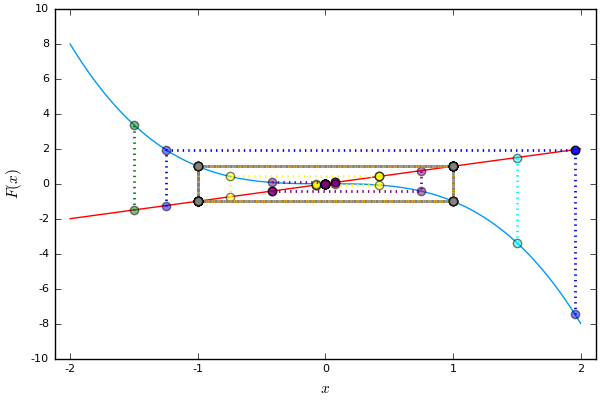

In [30]:
rangox = -2.0:0.01:2.0
plot(rangox, F6, 
    xaxis=(L"x", (-2.0:2.0)), 
    yaxis=(L"F(x)", (-10.0:2.0:10.0)), 
    legend=false, grid=false)
plot!(rangox, x->x, color=:red) 

VectorX1,VectorY1 = IteradorDeEntesAbstractosV2(F6,2,-1.5)
plot!(VectorX1,VectorY1, line=(:green, :path, 2.0, :dot), marker=(:point, :green, 0.5))

VectorX2,VectorY2 = IteradorDeEntesAbstractosV2(F6,6,-1.25)
plot!(VectorX2,VectorY2, line=(:blue, :path, 2.0, :dot), marker=(:point, :blue, 0.5))

VectorX3,VectorY3 = IteradorDeEntesAbstractosV2(F6,25,-0.75)
plot!(VectorX3,VectorY3, line=(:yellow, :path, 2.0, :dot), marker=(:point, :yellow, 0.5))

VectorX4,VectorY4 = IteradorDeEntesAbstractosV2(F6,25,0.75)
plot!(VectorX4,VectorY4, line=(:purple, :path, 2.0, :dot), marker=(:point, :purple, 0.5))

VectorX5,VectorY5 = IteradorDeEntesAbstractosV2(F6,25,1.0)
plot!(VectorX5,VectorY5, line=(:orange, :path, 2.0, :dot), marker=(:point, :orange, 0.5))

VectorX6,VectorY6= IteradorDeEntesAbstractosV2(F6,2,1.5)
plot!(VectorX6,VectorY6, line=(:cyan, :path, 2.0, :dot), marker=(:point, :cyan, 0.5))

VectorX7,VectorY7= IteradorDeEntesAbstractosV2(F6,25,-1.0)
plot!(VectorX7,VectorY7, line=(:gray, :path, 2.0, :dot), marker=(:point, :gray, 0.5))

Se iteraron pocas veces los números mayores a uno, en valor absoluto, porqué divergen muy rápido (formando espirales con centro en el origen). Es muy similar al caso anterior: los números menores a uno, en valor absoluto, convergen a cero pero el uno y menos uno ahora son de periodo dos.

### Ejercicio 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.

In [31]:
function F7(x)
    f7 = x
    return f7
end

function F8(x)
    f8 = -x
    return f8
end

function F9(x)
    f9 = x-x^2
    return f9
end

F9 (generic function with 1 method)


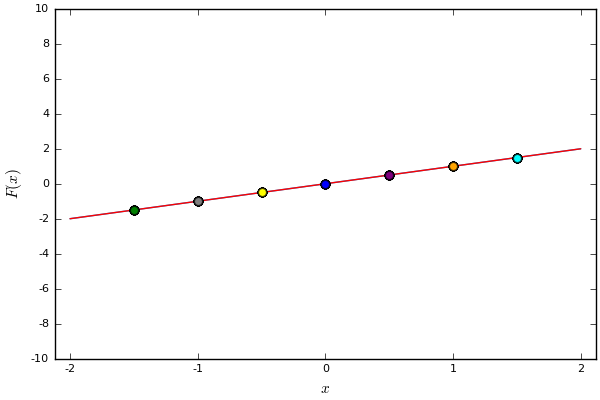

In [36]:
rangox = -2.0:0.01:2.0
plot(rangox, F7, 
    xaxis=(L"x", (-2.0:2.0)), 
    yaxis=(L"F(x)", (-10.0:2.0:10.0)), 
    legend=false, grid=false)
plot!(rangox, x->x, color=:red) 

VectorX1,VectorY1 = IteradorDeEntesAbstractosV2(F7,25,-1.5)
plot!(VectorX1,VectorY1, line=(:green, :path, 2.0, :dot), marker=(:point, :green, 0.5))

VectorX2,VectorY2 = IteradorDeEntesAbstractosV2(F7,25,0.0)
plot!(VectorX2,VectorY2, line=(:blue, :path, 2.0, :dot), marker=(:point, :blue, 0.5))

VectorX3,VectorY3 = IteradorDeEntesAbstractosV2(F7,25,-0.5)
plot!(VectorX3,VectorY3, line=(:yellow, :path, 2.0, :dot), marker=(:point, :yellow, 0.5))

VectorX4,VectorY4 = IteradorDeEntesAbstractosV2(F7,25,0.5)
plot!(VectorX4,VectorY4, line=(:purple, :path, 2.0, :dot), marker=(:point, :purple, 0.5))

VectorX5,VectorY5 = IteradorDeEntesAbstractosV2(F7,25,1.0)
plot!(VectorX5,VectorY5, line=(:orange, :path, 2.0, :dot), marker=(:point, :orange, 0.5))

VectorX6,VectorY6= IteradorDeEntesAbstractosV2(F7,25,1.5)
plot!(VectorX6,VectorY6, line=(:cyan, :path, 2.0, :dot), marker=(:point, :cyan, 0.5))

VectorX7,VectorY7= IteradorDeEntesAbstractosV2(F7,25,-1.0)
plot!(VectorX7,VectorY7, line=(:gray, :path, 2.0, :dot), marker=(:point, :gray, 0.5))

Todas las condiciones iniciales son puntos fijos.


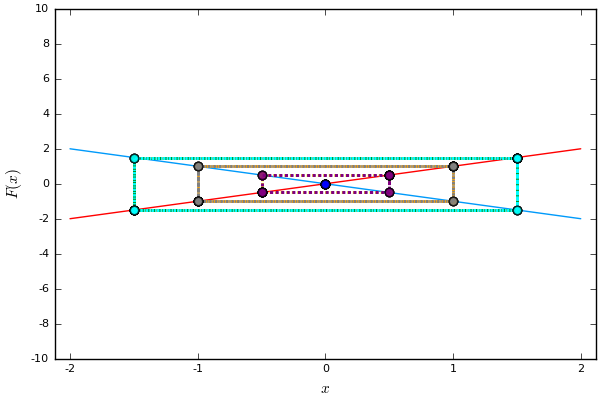

In [37]:
rangox = -2.0:0.01:2.0
plot(rangox, F8, 
    xaxis=(L"x", (-2.0:2.0)), 
    yaxis=(L"F(x)", (-10.0:2.0:10.0)), 
    legend=false, grid=false)
plot!(rangox, x->x, color=:red) 

VectorX1,VectorY1 = IteradorDeEntesAbstractosV2(F8,25,-1.5)
plot!(VectorX1,VectorY1, line=(:green, :path, 2.0, :dot), marker=(:point, :green, 0.5))

VectorX2,VectorY2 = IteradorDeEntesAbstractosV2(F8,25,0.0)
plot!(VectorX2,VectorY2, line=(:blue, :path, 2.0, :dot), marker=(:point, :blue, 0.5))

VectorX3,VectorY3 = IteradorDeEntesAbstractosV2(F8,25,-0.5)
plot!(VectorX3,VectorY3, line=(:yellow, :path, 2.0, :dot), marker=(:point, :yellow, 0.5))

VectorX4,VectorY4 = IteradorDeEntesAbstractosV2(F8,25,0.5)
plot!(VectorX4,VectorY4, line=(:purple, :path, 2.0, :dot), marker=(:point, :purple, 0.5))

VectorX5,VectorY5 = IteradorDeEntesAbstractosV2(F8,25,1.0)
plot!(VectorX5,VectorY5, line=(:orange, :path, 2.0, :dot), marker=(:point, :orange, 0.5))

VectorX6,VectorY6= IteradorDeEntesAbstractosV2(F8,25,1.5)
plot!(VectorX6,VectorY6, line=(:cyan, :path, 2.0, :dot), marker=(:point, :cyan, 0.5))

VectorX7,VectorY7= IteradorDeEntesAbstractosV2(F8,25,-1.0)
plot!(VectorX7,VectorY7, line=(:gray, :path, 2.0, :dot), marker=(:point, :gray, 0.5))

Todas las condiciones iniciales forman orbitas de periodo dos.


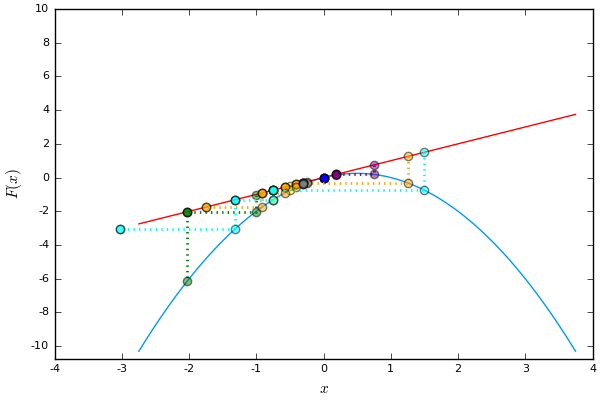

In [73]:
rangox = -2.75:0.01:3.75
plot(rangox, F9, 
    xaxis=(L"x", (-4.0:4.0)), 
    yaxis=(L"F(x)", (-10.0:2.0:10.0)), 
    legend=false, grid=false)
plot!(rangox, x->x, color=:red) 

VectorX1,VectorY1 = IteradorDeEntesAbstractosV2(F9,5,-1.01)
plot!(VectorX1,VectorY1, line=(:green, :path, 2.0, :dot), marker=(:point, :green, 0.5))

VectorX2,VectorY2 = IteradorDeEntesAbstractosV2(F9,5,0.0)
plot!(VectorX2,VectorY2, line=(:blue, :path, 2.0, :dot), marker=(:point, :blue, 0.5))

VectorX3,VectorY3 = IteradorDeEntesAbstractosV2(F9,5,-0.5)
plot!(VectorX3,VectorY3, line=(:yellow, :path, 2.0, :dot), marker=(:point, :yellow, 0.5))

VectorX4,VectorY4 = IteradorDeEntesAbstractosV2(F9,5,0.75)
plot!(VectorX4,VectorY4, line=(:purple, :path, 2.0, :dot), marker=(:point, :purple, 0.5))

VectorX5,VectorY5 = IteradorDeEntesAbstractosV2(F9,20,1.25)
plot!(VectorX5,VectorY5, line=(:orange, :path, 2.0, :dot), marker=(:point, :orange, 0.5))

VectorX6,VectorY6= IteradorDeEntesAbstractosV2(F9,12,1.5)
plot!(VectorX6,VectorY6, line=(:cyan, :path, 2.0, :dot), marker=(:point, :cyan, 0.5))

VectorX7,VectorY7= IteradorDeEntesAbstractosV2(F9,5,-0.25)
plot!(VectorX7,VectorY7, line=(:gray, :path, 2.0, :dot), marker=(:point, :gray, 0.5))

Todas las condiciones iniciales fuera del intervalo (-0.25,1.25) divergen hacia el lado izquierdo, pero los puntos dentro de ese intervalo son atraidos al 0.25 y al 0.75, cabe mencionar el cero es un punto fijo, pero parece ser repulsivo.